In [109]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import lombardi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
rbs = lombardi.data.active_rbs()

In [111]:
rbs

,player_name,year,games
0,Frank Gore,2014,16
1,LeGarrette Blount,2014,14
2,Robert Turbin,2014,16
3,DeMarco Murray,2014,16
4,Doug Martin,2012,16
5,Brandon Bolden,2013,10
6,Le'Veon Bell,2014,16
7,Steven Jackson,2014,15
8,Lamar Miller,2014,16
9,Chris Johnson,2010,16


In [86]:
x = np.linspace(0, lombardi.data.metric_range('rushing_yds'), 1000)
distributions = []

for row in rbs.iterrows():
    try:
        d = row[1]
        data = lombardi.data.player_metric(d['player_name'], 'rushing_yds', min_year=d['year'], max_year=d['year'])
        distributions.append(dict(
            player=d['player_name'],
            year=d['year'],
            param=lombardi.stats.poisson_params(x, data),
            yds=data,
            ))
    except:
        print 'no good - ', d['player_name']
        pass

 300 2.96781884067
300 2.02844310914
300 1.09473684295
300 4.10030090626
300 3.64835167397
300 1.32682060342
no good -  Le'Veon Bell
300 1.75743161983
300 2.59500542922
300 3.28461537042
300 3.63679809117
300 2.22523745592
300 2.63402064264
300 2.68800933089
300 2.76821192189
300 2.142857105
300 1.77110157587
300 2.19401042138
300 1.12923729371
300 2.5368663605
300 1.61702129613
300 1.48341231173
300 3.38770685744
300 1.56914121048
300 2.86885246033
300 2.21200510771
300 1.41025640977
300 1.85263158491
300 3.05314533765
300 1.00000000002
300 1.39607841088
300 2.86131384041
300 1.03792415265
300 2.20680630443
300 2.74175035995
300 2.18634421864
300 2.38135589837
300 2.06314583416
300 2.61276128153
300 2.18644068717
300 4.84661958946
300 2.83634431655
300 1.01400555191
300 1.87749289563
300 3.09061132469
300 3.03023255559
300 2.27636365945
300 1.00000000002
300 3.84642437223
300 2.78316032414
300 3.87580990811
300 2.51703163274
300 1.53144653998
300 3.15977656403
300 2.14037433198
300 1.

In [88]:
for p in sorted(distributions, key=lambda x:np.mean(x['yds'])):
    print p['player'], p['year'], p['param'], np.mean(p['yds'])

James White 2015 3.58792896155 4.66666666667
Fred Jackson 2015 1.00000000002 6.66666666667
Matt Asiata 2015 1.00000001045 7.46666666667
Fozzy Whittaker 2015 1.00439335677 7.71428571429
Theo Riddick 2015 0.999999999746 8.3125
C.J. Spiller 2015 0.999999999975 8.53846153846
Justin Forsett 2011 1.00000000002 9.0625
Bilal Powell 2014 1.00000000004 9.4
Stepfan Taylor 2013 1.0427350252 9.58333333333
Dexter McCluster 2014 1.00898691117 10.0769230769
Toby Gerhart 2012 1.0572519106 11.2666666667
Jordan Todman 2014 1.64456234575 11.625
Jacquizz Rodgers 2011 1.05594405884 12.8125
Rashad Jennings 2009 1.21818182207 13.4666666667
Jacquizz Rodgers 2014 1.07058824425 13.5625
Shaun Draughn 2012 1.29255318031 14.5625
Darren Sproles 2013 1.01021464441 14.6666666667
Knile Davis 2013 1.57258062266 15.125
Benny Cunningham 2014 1.07234043498 15.25
Devonta Freeman 2014 1.01400555191 15.5
Tre Mason 2015 1.16062175077 15.9230769231
Andre Williams 2015 1.0457142864 16.0625
Roy Helu 2014 1.15637859453 16.15384615

In [89]:
sensible_results = [p for p in distributions if np.mean(p['yds']) > 10]

In [90]:
all_params = [p['param'] for p in sensible_results]

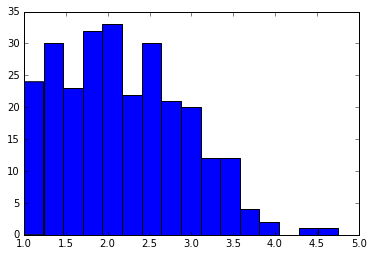

In [133]:
def bin_data(x_sample, bin_size):
    return (x_sample - x_sample % bin_size)

# bin this shit from 1-5 in 16 bins
bin_size = 0.25
binned_params = [bin_data(i, bin_size) for i in all_params]

# holy crap this is p(lambda) - need to adjust to continuous?
plt.hist(
    binned_params,
    bins=16,
    )

# generate discrete pdf given param dist
discrete_pdf = {}
for i in set(binned_params):
    discrete_pdf[i] = len([a for a in binned_params if a == i])

discrete_pdf = {k: float(v)/sum(discrete_pdf.values()) for k,v in discrete_pdf.iteritems()}


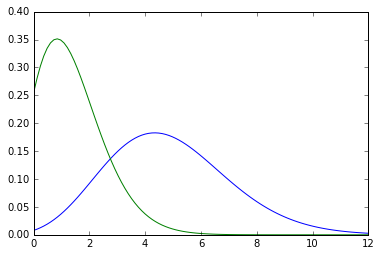

In [142]:
m = np.linspace(1, 4.75, 16)
x = np.linspace(0, 12, 100)

def p_x_m(x, mu):
    return lombardi.stats.poisson(x, mu)

def p_m(m):
    # bucket m
    m = bin_data(m, 0.25)
    return discrete_pdf.get(m,0)

def update_prior(x_s, prior):
    
    result = [
        p_x_m(x_s, m_s) * p_m
        for m_s, p_m in zip(m,prior)
    ]
    
    result = np.nan_to_num(result)
    return [r/sum(result) for r in result]

def posterior_predictive(posterior):
    # generate pdf(x) from our posterior pdf(m)
    fx = [0 for i in x]
    for idx, x_s in enumerate(x):
        r = 0
        for m_s, p in zip(m, posterior):
            r += p_x_m(x_s, m_s) * p

        fx[idx] = r
    
    return fx

y_ap = [p_x_l(i, 4.85) for i in x]
y_ds = [p_x_l(i, 1.37) for i in x]
plt.plot(x,y_ap)
plt.plot(x,y_ds)

In [156]:
max_yds = 300
max_poisson_x = 12

ratio = max_yds / max_poisson_x
bin_size = 25

def bin_yds(yds, bin_size):
    return yds / ratio

20 0
82 3
45 1
70 2


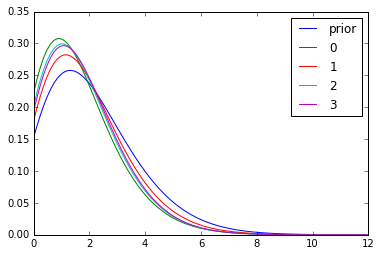

In [160]:
prior = []
for i in np.linspace(1, 4.75, 16):
    prior.append(p_m(i))

samples = [20, 82, 45, 70]

plt.plot(x, posterior_predictive(prior), label='prior')
for idx, s in enumerate(samples):
    bs = bin_yds(s, 25)
    print s, bs
    prior = update_prior(bs, prior)
    plt.plot(x, posterior_predictive(prior), label=idx)
plt.legend()

92.8125


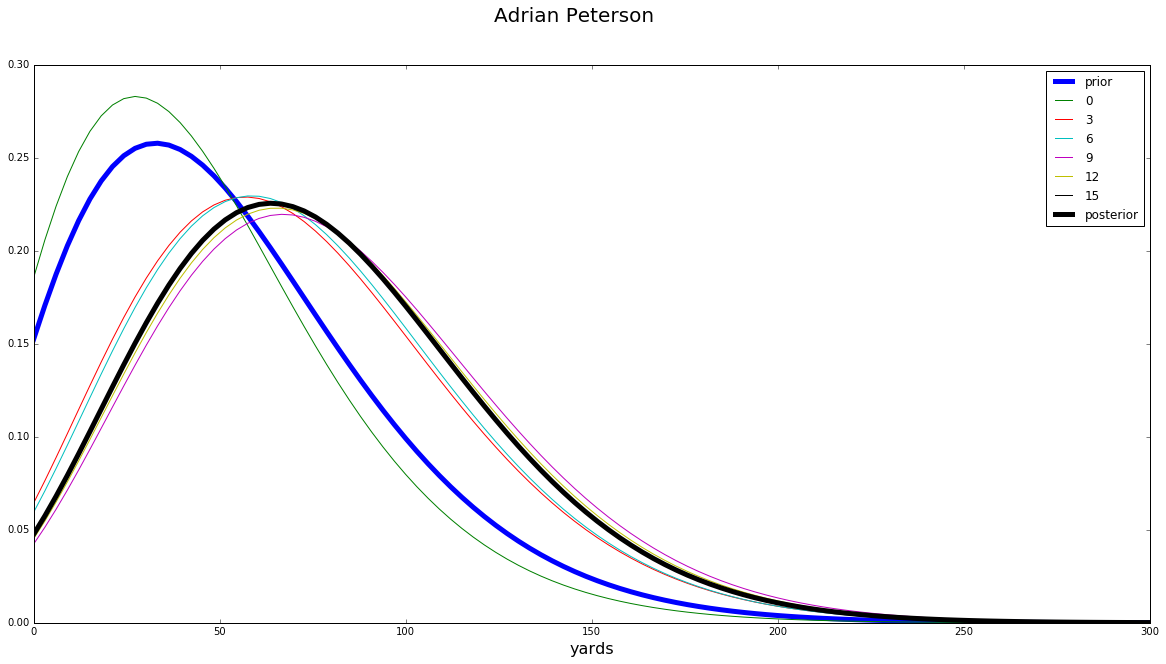

In [181]:
prior = [p_m(i) for i in np.linspace(1, 4.75, 16)]

ap_data = lombardi.data.player_metric('Adrian Peterson', 'rushing_yds', min_year=2015, max_year=2015)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Adrian Peterson', size=20)
plt.xlabel('yards', size=16)

x_plot = [i * ratio for i in x]

plt.plot(x_plot, posterior_predictive(prior), label='prior', lw='5')
for idx, s in enumerate(ap_data):
    bs = bin_yds(s, 25)
    prior = update_prior(bs, prior)
    if idx % 3 == 0:
        plt.plot(x_plot, posterior_predictive(prior), label=idx)
plt.plot(x_plot, posterior_predictive(prior), label='posterior', lw='5',c='black')
plt.legend()

print np.mean(ap_data)

[31, 134, 126, 81, 60, 98, 103, 125, 203, 45, 158, 18, 69, 63, 104, 67]
[85, 9, 46, 90, 27, 3, 38, 10, 100, 105, 4, 124, 23, 60, 34]
15 16
92.8125 50.5333333333


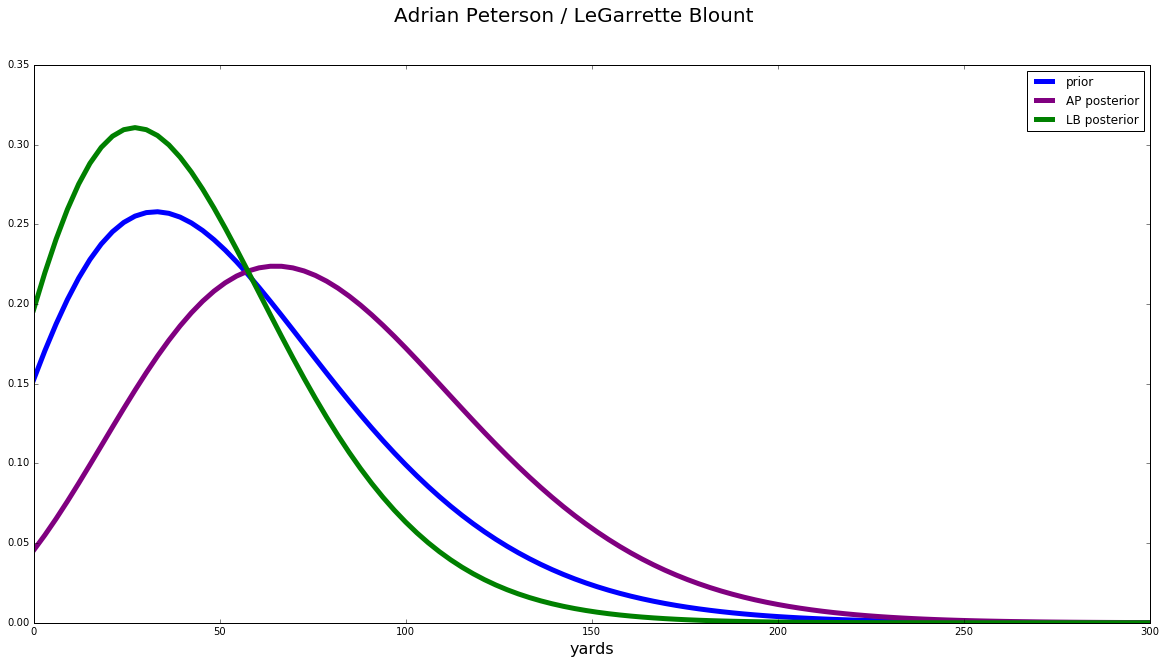

In [193]:
prior = [p_m(i) for i in np.linspace(1, 4.75, 16)]

ap_data = lombardi.data.player_metric('Adrian Peterson', 'rushing_yds', min_year=2015, max_year=2015)
lb_data = lombardi.data.player_metric('Eddie Lacy', 'rushing_yds', min_year=2015, max_year=2015)

print ap_data
print lb_data

print len(lb_data), len(ap_data)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Adrian Peterson / LeGarrette Blount', size=20)
plt.xlabel('yards', size=16)

x_plot = [i * ratio for i in x]

plt.plot(x_plot, posterior_predictive(prior), label='prior', lw='5')

ap_prior = prior
lb_prior = prior

for i in range(len(lb_data)):
    
    # update ap prior
    bs = bin_yds(ap_data[i], 25)
    ap_prior = update_prior(bs, ap_prior)
    
    # update lb prior
    bs = bin_yds(lb_data[i], 25)
    lb_prior = update_prior(bs, lb_prior)
    

plt.plot(x_plot, posterior_predictive(ap_prior), label='AP posterior', lw='5',c='purple')
plt.plot(x_plot, posterior_predictive(lb_prior), label='LB posterior', lw='5',c='green')
plt.legend()

print np.mean(ap_data), np.mean(lb_data)


92.8125


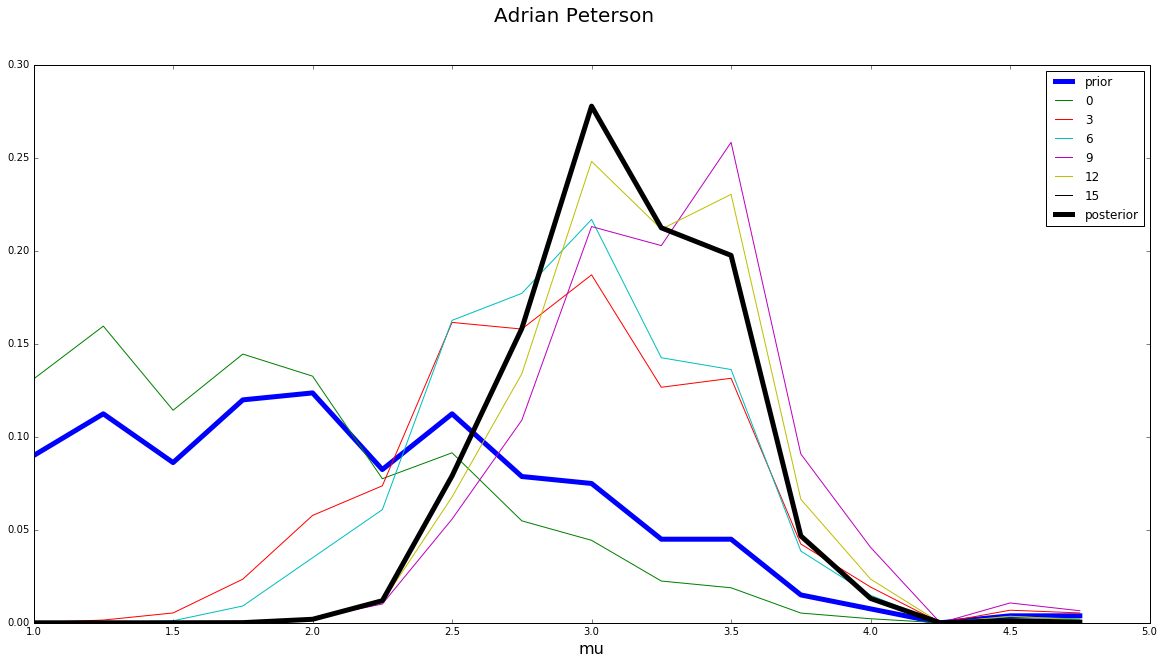

In [195]:
prior = [p_m(i) for i in np.linspace(1, 4.75, 16)]

ap_data = lombardi.data.player_metric('Adrian Peterson', 'rushing_yds', min_year=2015, max_year=2015)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Adrian Peterson', size=20)
plt.xlabel('mu', size=16)

x_plot = [i * ratio for i in x]

plt.plot(m, prior, label='prior', lw='5')
for idx, s in enumerate(ap_data):
    bs = bin_yds(s, 25)
    prior = update_prior(bs, prior)
    if idx % 3 == 0:
        plt.plot(m, prior, label=idx)
plt.plot(m, prior, label='posterior', lw='5',c='black')
plt.legend()